# Project 2 Classification

## Step 1

Design a set of rules to classify data, e.g., classify students with good performance.
* You should design `k` features/attributes for your problems first.
* Use 'absolutely right' rules to generate your positive and negative data (the number of data = `M`)


### Generate Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
sex_choice = ['male', 'female']
nationality_choice = ['Taiwan', 'Japan', 'Korea', 'China', 'USA', 'Canada', 'Australia',
                      'UK', 'Ireland', 'France', 'Germany', 'Spain', 'Portugal',
                      'Brazil', 'Argentina']
blood_type = ['A', 'B', 'O', 'AB']
date_range = pd.period_range(start='1980-01-01', end='2004-12-31', freq='D')
yes_no = [True, False]
M = 900

f1 = np.random.choice(sex_choice, size=M)
f2 = np.random.randint(30, 300, size=M)
f3 = np.random.randint(140, 220, size=M)
f4 = np.random.randint(20000, 200000, size=M)
f5 = np.random.randint(0, 11, size=M)
f6 = np.random.randint(0, 11, size=M)
f7 = np.random.choice(nationality_choice, size=M)
f8 = np.random.choice(yes_no, size=M)
f9 = np.random.choice(yes_no, size=M)
f10 = np.random.choice(yes_no, size=M)
f11 = np.random.choice(date_range, size=M)
f12 = np.random.choice(yes_no, size=M)
f13 = np.random.choice(yes_no, size=M)
f14 = np.random.randint(0, 5, size=M)
f15 = np.random.randint(0, 10, size=M)
f16 = np.random.choice(blood_type, size=M)
f17 = np.random.randint(1, 21, size=M)
f18 = np.random.randint(50, 201, size=M)
f19 = np.random.randint(0, 21, size=M)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
positive_df = pd.DataFrame(data={'ID': '', 'Sex': f1, 'Weight': f2, 
                        'Height': f3, 'Salary': f4, 'Num_of_cat': f5, 
                        'Num_of_dog': f6, 'Nationality': f7, 'Glasses': f8, 'Beard': f9,
                        'Tattoo': f10, 'Birth': f11, 'Licence': f12, 'Married': f13, 'House': f14,
                        'Car': f15, 'Blood': f16, 'Order': f17, 'IQ': f18, 'Children': f19, 'Major': ''})

positive_df.head()

ID     Sex  Weight  Height  Salary  Num_of_cat  Num_of_dog Nationality  \
0     female     199     182  122479           2           2      Canada   
1       male      70     145   92907           5           2   Argentina   
2     female     272     181   33204           5           3      France   
3     female     196     204  190993           7           7     Germany   
4     female      31     204  110715           7           1       Spain   

   Glasses  Beard  Tattoo       Birth  Licence  Married  House  Car Blood  \
0    False   True    True  1996-12-27     True    False      4    5    AB   
1     True   True    True  1997-03-01     True    False      3    4     A   
2     True   True   False  1996-05-03    False    False      1    9     O   
3     True  False    True  1985-09-29     True    False      2    0     A   
4     True  False    True  2004-09-28    False     True      4    3    AB   

   Order   IQ  Children Major  
0      2  105         4        
1     19   77        18        
2     11  169        12        
3      6  129         9        
4     16  118        19

In [5]:
major_list = ['Business', 'Education', 'Medicine', 'Nursing', 'Law',
              'Chemistry', 'Physics', 'Computer Science', 'Statistics',
              'Psychology', 'History', 'Political Science', 'Fine Arts']

def rule(f):
    if f[10] == True:
        if f[12] == True: # licence
            if f[15] > 0: # car
                if f[14] > 0: # house
                    if f[13] == True: # married
                        if f[19] > 0:
                            return 'Medicine'
                        else:
                            return 'Computer Science'
                    else: # married
                        if f[2] >= 180:
                            if f[4] >= 120000:
                                return 'Computer Science'
                            else:
                                return 'Law'
                        else:
                            if f[17] < 2:
                                return 'Computer Science'
                            else:
                                return 'Physics'
                else:   # house
                    return 'Statistics'
            else:   # car
                if f[4] > 100000: # salary
                    if f[13] == True: # married
                        return 'Law'
                    else: # married
                        if f[3] >= 180:
                            if f[2] < 80: # weight
                                if f[1] == 'Male':
                                    if f[19] > 0:
                                        return 'Medicine'
                                    else:
                                        return 'Statistics'
                                else: # sex
                                    return 'Business'
                            else: # weight
                                return 'Education'
                        else: # height
                            return 'Law'
                else: #salary
                    return 'Chemistry'
        else: # licence
            if f[14] > 0: # house
                if f[18] >= 150:
                    return 'Physics'
                else: # IQ
                    if f[11] >= pd.Period('1990-01-01'):
                        if f[17] >= 5:
                            if f[16] == 'O': # blood
                                return 'Nursing'
                            else:
                                return 'Chemistry'
                        else: # order
                            if f[16] == 'B': # blood
                                return 'Statistics'
                            else:
                                return 'Law'
                    else: # birth
                        return 'Education'
            else: # house
                if f[6] >= 6: # dog
                    return 'Psychology'
                else: # dog
                    if f[8] == True: # glasses
                        return 'Computer Science'
                    else:
                        return 'Medicine'
    else: # tattoo
        if f[9]: #beard
            if f[4] < 50000:
                if f[14] <= 1:
                    if f[5] >= 2:
                        return 'Fine Arts'
                    else: # cat
                        if f[6] > 0: # dog
                            if f[6] in ['UK', 'Ireland', 'France', 'Germany', 'Spain', 'Portugal']:
                                return 'History'
                            else: # nationality
                                if f[6] in ['USA', 'Canada', 'Australia']:
                                    return 'Political Science'
                                else: 
                                    return 'Education'
                        else: # dog
                            if f[6] in ['Taiwan', 'Japan', 'Korea']:
                                return 'Law'
                            else:
                                if f[6] in ['Brazil', 'Argentina']:
                                    return 'Fine Arts'
                                else:
                                    if f[8] == True:
                                        return 'Business'
                                    else:
                                        return 'Psychology'
                else: # house
                    return 'Business'
            else: # salary
                return 'Business'
        else: # beard
            if f[2] > 80:
                if f[13] == True: # married
                    if f[19] >= 3:
                        return 'Psychology'
                    else: # children
                        return 'Business'
                else: # married
                    return 'Fine Arts'
            else: # weight
                if f[4] >= 180000:
                    if f[1] == 'Male':
                        if f[8] == True: # glasses
                            if f[5] > 0:
                                return 'Computer Science'
                            else:
                                return 'Law'
                        else:
                            return 'Business'
                    else: # sex
                        if f[8] == True: # glasses
                            if f[5] > 5: # cat
                                return 'History'
                            else: # cat
                                return 'Political Science'
                        else:
                            return 'Education'
                else:
                    return 'Fine Arts'

In [6]:
positive_df['Major'] = positive_df[['ID', 'Sex', 'Weight', 'Height', 'Salary',
                  'Num_of_cat', 'Num_of_dog', 'Nationality', 'Glasses', 'Beard',
                  'Tattoo', 'Birth', 'Licence', 'Married', 'House',
                  'Car', 'Blood', 'Order', 'IQ', 'Children']].apply(rule, axis=1)

#### Negative data

In [7]:
M = 100

f1 = np.random.choice(sex_choice, size=M)
f2 = np.random.randint(30, 300, size=M)
f3 = np.random.randint(140, 220, size=M)
f4 = np.random.randint(20000, 200000, size=M)
f5 = np.random.randint(0, 11, size=M)
f6 = np.random.randint(0, 11, size=M)
f7 = np.random.choice(nationality_choice, size=M)
f8 = np.random.choice(yes_no, size=M)
f9 = np.random.choice(yes_no, size=M)
f10 = np.random.choice(yes_no, size=M)
f11 = np.random.choice(date_range, size=M)
f12 = np.random.choice(yes_no, size=M)
f13 = np.random.choice(yes_no, size=M)
f14 = np.random.randint(0, 5, size=M)
f15 = np.random.randint(0, 10, size=M)
f16 = np.random.choice(blood_type, size=M)
f17 = np.random.randint(1, 21, size=M)
f18 = np.random.randint(50, 201, size=M)
f19 = np.random.randint(0, 21, size=M)
f20 = np.random.choice(major_list, size=M)

In [8]:
negative_df = pd.DataFrame(data={'ID': '', 'Sex': f1, 'Weight': f2, 
                        'Height': f3, 'Salary': f4, 'Num_of_cat': f5, 
                        'Num_of_dog': f6, 'Nationality': f7, 'Glasses': f8, 'Beard': f9,
                        'Tattoo': f10, 'Birth': f11, 'Licence': f12, 'Married': f13, 'House': f14,
                        'Car': f15, 'Blood': f16, 'Order': f17, 'IQ': f18, 'Children': f19, 'Major': f20})

negative_df.head()

ID     Sex  Weight  Height  Salary  Num_of_cat  Num_of_dog Nationality  \
0     female     153     169  130211           1           5       Spain   
1       male     217     169   60921           6           9     Ireland   
2       male     221     160  144040           6           4   Argentina   
3       male      92     162   58678           8           9     Germany   
4     female     266     217  197596           7          10      Brazil   

   Glasses  Beard  Tattoo       Birth  Licence  Married  House  Car Blood  \
0    False  False   False  2003-05-25     True    False      3    5     O   
1    False   True    True  1986-10-23     True     True      3    8     A   
2     True  False    True  1983-08-31    False     True      0    0     O   
3     True   True    True  1985-02-18     True     True      0    5    AB   
4     True  False    True  1994-10-31     True     True      2    0     O   

   Order   IQ  Children             Major  
0     14   74         4           History  
1      4   93        15  Computer Science  
2     20   58         8           Nursing  
3     19  108        17         Fine Arts  
4     20  184        19          Business

In [9]:
df = pd.concat([positive_df, negative_df])
df.head()

ID     Sex  Weight  Height  Salary  Num_of_cat  Num_of_dog Nationality  \
0     female     199     182  122479           2           2      Canada   
1       male      70     145   92907           5           2   Argentina   
2     female     272     181   33204           5           3      France   
3     female     196     204  190993           7           7     Germany   
4     female      31     204  110715           7           1       Spain   

   Glasses  Beard  Tattoo       Birth  Licence  Married  House  Car Blood  \
0    False   True    True  1996-12-27     True    False      4    5    AB   
1     True   True    True  1997-03-01     True    False      3    4     A   
2     True   True   False  1996-05-03    False    False      1    9     O   
3     True  False    True  1985-09-29     True    False      2    0     A   
4     True  False    True  2004-09-28    False     True      4    3    AB   

   Order   IQ  Children             Major  
0      2  105         4  Computer Science  
1     19   77        18           Physics  
2     11  169        12         Fine Arts  
3      6  129         9         Education  
4     16  118        19         Chemistry

In [10]:
from sklearn.utils import shuffle

df = shuffle(df)
df = df.reset_index()
df = df.drop('index', axis=1)
df['ID'] = df.index
df.head()

ID     Sex  Weight  Height  Salary  Num_of_cat  Num_of_dog Nationality  \
0   0  female     259     175  125502           1          10       Korea   
1   1    male      64     193  135133           6           4       Spain   
2   2  female     179     208   61994           7           5    Portugal   
3   3  female     274     180   22803          10           3       Spain   
4   4  female     189     157  147855           7           3   Australia   

   Glasses  Beard  Tattoo       Birth  Licence  Married  House  Car Blood  \
0    False  False   False  2004-06-02    False    False      3    5    AB   
1    False   True    True  2003-08-28     True    False      2    4    AB   
2     True   True    True  2002-05-06     True     True      2    1    AB   
3     True  False    True  2004-08-24     True     True      2    3    AB   
4     True  False   False  1990-02-12     True    False      3    1     O   

   Order   IQ  Children      Major  
0      1  124        10  Fine Arts  
1     15  115         1    Physics  
2      5  129         2   Medicine  
3     14  110         9   Medicine  
4     11  163        13  Fine Arts

## Step 2

Use the data generated in Step 1 to construct your classification model
* Decision tree is basic requirement, you can add more classification models.


### Data Preprocessing

In [11]:
sex_map = {'male': 0, 'female': 1}
true_false_map = {True: 0, False: 1}
blood_map = {'A': 0, 'B': 1, 'O': 2, 'AB': 3}
nationality_map = {'Taiwan': 0, 'Japan': 1, 'Korea': 2, 'China': 3, 'USA': 4, 'Canada': 5, 'Australia': 6,
                      'UK': 7, 'Ireland': 8, 'France': 9, 'Germany': 10, 'Spain': 11, 'Portugal': 12,
                      'Brazil': 13, 'Argentina': 14}

df['Sex'] = df['Sex'].map(sex_map)
df['Nationality'] = df['Nationality'].map(nationality_map)
df['Blood'] = df['Blood'].map(blood_map)
df['Glasses'] = df['Glasses'].map(true_false_map)
df['Beard'] = df['Beard'].map(true_false_map)
df['Tattoo'] = df['Tattoo'].map(true_false_map)
df['Licence'] = df['Licence'].map(true_false_map)
df['Married'] = df['Married'].map(true_false_map)
df['Birth'] = df['Birth'].apply(lambda x: x.year)

df.head()

ID  Sex  Weight  Height  Salary  Num_of_cat  Num_of_dog  Nationality  \
0   0    1     259     175  125502           1          10            2   
1   1    0      64     193  135133           6           4           11   
2   2    1     179     208   61994           7           5           12   
3   3    1     274     180   22803          10           3           11   
4   4    1     189     157  147855           7           3            6   

   Glasses  Beard  Tattoo  Birth  Licence  Married  House  Car  Blood  Order  \
0        1      1       1   2004        1        1      3    5      3      1   
1        1      0       0   2003        0        1      2    4      3     15   
2        0      0       0   2002        0        0      2    1      3      5   
3        0      1       0   2004        0        0      2    3      3     14   
4        0      1       1   1990        0        1      3    1      2     11   

    IQ  Children      Major  
0  124        10  Fine Arts  
1  115         1    Physics  
2  129         2   Medicine  
3  110         9   Medicine  
4  163        13  Fine Arts

In [12]:
df_train = df[:800]
df_test = df[800:]

In [13]:
X_train = df_train.drop('Major', axis=1)
y_train = df_train['Major'].values

X_test = df_test.drop('Major', axis=1)
y_test = df_test['Major'].values

### Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import pydotplus

/usr/local/lib/python3.7/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [15]:
dtree = DecisionTreeClassifier(max_depth=9)
dtree.fit(X_train, y_train)

dot_data = StringIO()
export_graphviz(dtree, 
                out_file=dot_data,  
                filled=True, 
                feature_names=list(X_train),
                class_names=major_list,
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_pdf('decision_tree.pdf')

True

In [16]:
from IPython.display import Image  

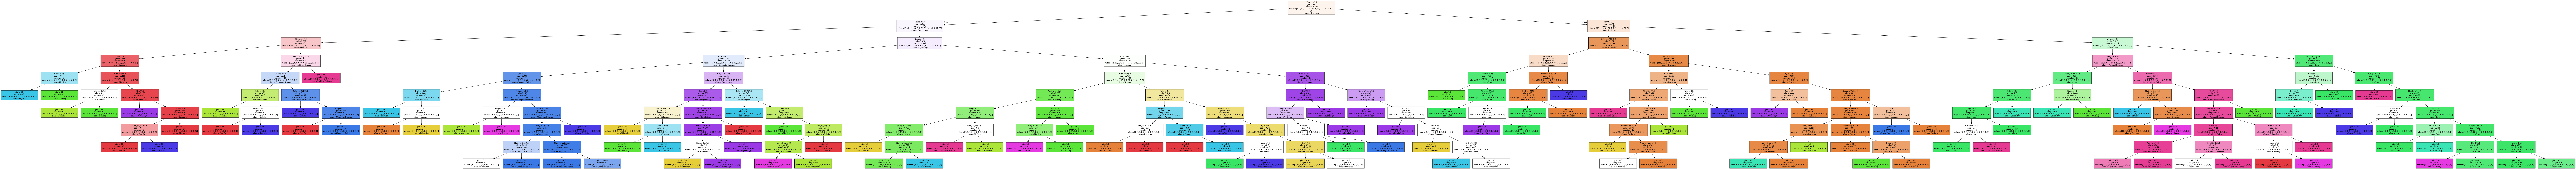

In [17]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [19]:
# plot_tree(dtree)  

#### Calculate accuracy

In [20]:
y_predict = dtree.predict(X_test)
accuracy_score(y_test, y_predict)

0.745

### K-Nearest Neighbor

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
neigh = KNeighborsClassifier(n_neighbors=len(major_list))

In [23]:
neigh.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')

#### Calculate accuracy

In [24]:
y_pred = neigh.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred)

0.175

## Step 3

Compare the rules in the decision tree from Step 2 and the rules you used to generate your 'right' data


## Step 4

Discuss anything you can
